## General Setup

In [ ]:
import os
import math
import datetime
import requests
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib
from matplotlib import cm, style
from decimal import Decimal

# Setting pandas options
pd.options.mode.chained_assignment = None  # Suppress SettingWithCopyWarning

# Matplotlib configuration
style.use('ggplot')
plt.rcParams['axes.facecolor'] = '#ebeae8'  # Set background color for plots
plt.rcParams['text.usetex'] = False  # Disable LaTeX rendering for text
plt.rcParams['figure.autolayout'] = False  # Disable automatic figure layout

# Use the 'tableau-colorblind10' style for plots - no longer used. Opted to hard-code for expediency.
# plt.style.use('tableau-colorblind10')
# Define original color palettes, no longer used.
# default_colors = ['#91161caa', '#1c4d20aa', '#242666aa', '#6e4b29aa']
# Redefine to match tableau-colorblind10 [#006BA4, #FF800E, #ABABAB, #595959, #5F9ED1, #C85200, #898989, #A2C8EC, #FFBC79, #CFCFCF]
default_colors = ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF',]

# Set default figure size
width, height = 12, 10
matplotlib.rcParams['figure.figsize'] = [width, height]

# Initialize a dictionary to store dataframes
dfs = {}


### Download Data from GDrive Directly without Mounting

In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

# Define the base directory for the dataset
# Note: Change the `base_directory` path to wherever you want the figures saved.
base_directory = '/content/drive/My Drive/2024/Papers/Reddit-Climate-Data-2005-2021/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_gdrive_url(url: str) -> pd.DataFrame:
    """
    Fetch a CSV file from a Google Drive URL and load it into a pandas DataFrame.

    Args:
        url (str): The Google Drive URL.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    print(f"Fetching: {url}")

    # Convert the Google Drive URL to a direct download link
    download_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
    print(f"   Using: {download_url}")

    # Read the CSV file into a DataFrame
    return pd.read_csv(download_url, low_memory=False)

def get_by_gdrive_id(file_id: str, func, header=[0]) -> pd.DataFrame:
    """
    Fetch a file from Google Drive by its file ID and load it using a specified function.

    Args:
        file_id (str): The Google Drive file ID.
        func (callable): The function to use for loading the file (e.g., pd.read_csv, pd.read_excel).
        header (list): The row(s) to use as the column names.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    print(f"header={header}")
    print(f" -     To View: https://drive.google.com/file/d/{file_id}/view?usp=sharing")

    # Convert the file ID to a direct download link
    download_url = f'https://drive.google.com/uc?id={file_id}'
    print(f" - To Download: {download_url}")

    # Load the file using the provided function
    # return func(download_url, low_memory=False, header=header)
    return func(download_url, header=header)

def get_csv_by_id(file_id: str, header=[0]) -> pd.DataFrame:
    """
    Fetch a CSV file from Google Drive by its file ID.

    Args:
        file_id (str): The Google Drive file ID.
        header (list): The row(s) to use as the column names.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    return get_by_gdrive_id(file_id, pd.read_csv, header=header)

def get_xlsx_by_id(file_id: str, header=[0]) -> pd.DataFrame:
    """
    Fetch an Excel file from Google Drive by its file ID.

    Args:
        file_id (str): The Google Drive file ID.
        header (list): The row(s) to use as the column names.

    Returns:
        pd.DataFrame: The loaded DataFrame.
    """
    return get_by_gdrive_id(file_id, pd.read_excel, header=header)

In [ ]:
# Initialize the summary dictionary
summary = {}

# Fetch and load the summary data of all climate-related posts by year
print("Fetching summary data of all climate-related posts by year (summary['year']).")
summary['year'] = get_csv_by_id('1gsSB2OCJQP7dYPPdXyiIZ7PQlu8pL4Xm')

# Display headers that don't include '_std' or '_sem'
print("Headers (_mean also have _std and _sem):")
filtered_headers = [col for col in summary['year'].columns if '_std' not in col and '_sem' not in col]
# filtered_headers  # Uncomment to print stuff.

Fetching summary data of all climate-related posts by year (summary['year']).
header=[0]
 -     To View: https://drive.google.com/file/d/1gsSB2OCJQP7dYPPdXyiIZ7PQlu8pL4Xm/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1gsSB2OCJQP7dYPPdXyiIZ7PQlu8pL4Xm
Headers (_mean also have _std and _sem):


In [ ]:
# Fetch and load the summary data of all climate-related posts by subreddit
print("Fetching summary data of all climate-related posts by subreddit (summary['subreddit']).")
summary['subreddit'] = get_csv_by_id('1CGn5ZCaEgf4FNYfoiBBcpWweqKj0HTDZ')

# Display headers that don't include '_std' or '_sem'
print("Headers (_mean also have _std and _sem):")
filtered_subreddit_headers = [col for col in summary['subreddit'].columns if '_std' not in col and '_sem' not in col]
# filtered_subreddit_headers  # Uncomment to print stuff.

Fetching summary data of all climate-related posts by subreddit (summary['subreddit']).
header=[0]
 -     To View: https://drive.google.com/file/d/1CGn5ZCaEgf4FNYfoiBBcpWweqKj0HTDZ/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1CGn5ZCaEgf4FNYfoiBBcpWweqKj0HTDZ
Headers (_mean also have _std and _sem):


In [ ]:
# Fetch and load the summary data of all climate-related posts by Day of the Week
print("Fetching summary data of all climate-related posts by Day of the Week (summary['day_of_week']).")
summary['day_of_week'] = get_csv_by_id('1nwzSTMuNCALK_lHC1nulWV5RyhEFo98K')

# Display headers to verify the data
# print("Headers (_mean also have _std and _sem):")
# [col for col in summary['day_of_week'].columns if '_std' not in col and '_sem' not in col]

Fetching summary data of all climate-related posts by Day of the Week (summary['day_of_week']).
header=[0]
 -     To View: https://drive.google.com/file/d/1nwzSTMuNCALK_lHC1nulWV5RyhEFo98K/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1nwzSTMuNCALK_lHC1nulWV5RyhEFo98K


In [ ]:
# Fetch and load the percentage of climate-matching posts data
print("Fetching percentage of climate-matching posts data (summary['matching']).")
summary['matching'] = get_csv_by_id('1mxije8khihN65p5_7HCkKR1TBhVceAkL')

# Display headers to verify the data
# print("Headers (_mean also have _std and _sem):")
# [col for col in summary['matching'].columns if '_std' not in col and '_sem' not in col]
# summary['matching']

Fetching percentage of climate-matching posts data (summary['matching']).
header=[0]
 -     To View: https://drive.google.com/file/d/1mxije8khihN65p5_7HCkKR1TBhVceAkL/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1mxije8khihN65p5_7HCkKR1TBhVceAkL


In [ ]:
# Fetch and load the summary data of top 25 unsorted NGrams
print("Fetching summary data of top 25 unsorted NGrams (summary['top_25_ngrams']).")
summary['top_25_ngrams'] = get_csv_by_id('1NXqxZ-AclFoUMVC10TuuHrQ3FQy_bEXY', header=[0, 1])

# Display headers to verify the data
# print("Headers (_mean also have _std and _sem):")
# [col for col in summary['top_25_ngrams'].columns if '_std' not in col and '_sem' not in col]

Fetching summary data of top 25 unsorted NGrams (summary['top_25_ngrams']).
header=[0, 1]
 -     To View: https://drive.google.com/file/d/1NXqxZ-AclFoUMVC10TuuHrQ3FQy_bEXY/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1NXqxZ-AclFoUMVC10TuuHrQ3FQy_bEXY


<ipython-input-3-1c5865c635ab>:41: DtypeWarning: Columns (3369,3370,3371,3406,3407,3408,3409,3410,3411,3412,3413,3414,3415,3416,3417,3418,3419,3420,3421,3422,3442,3443,3444,3445,3446,3447,3448,3449,3450,3451,3452,3453,3454,3455,3456,3457,3458,3478,3479,3480,3481,3482,3483,3484,3485,3486,3487,3488,3489,3490,3491,3492,3493,3494,3514,3515,3516,3517,3518,3519,3520,3521,3522,3523,3524,3525,3526,3527,3528,3529,3530,3549,3550,3551,3585,3586,3587,3621,3622,3623,3657,3658,3659,3693,3694,3695) have mixed types. Specify dtype option on import or set low_memory=False.
  return func(download_url, header=header)


In [ ]:
# Fetch and load the summary data of top 250 unsorted NGrams
print("Fetching summary data of top 250 unsorted NGrams (summary['ngram_data_250']).")
summary['ngram_data_250'] = get_xlsx_by_id('156ivKM4FYK1r2K_zsIm84Ml1disH3dXV', header=[0, 1])

# Display headers to verify the data
# print("Headers (_mean also have _std and _sem):")
# [col for col in summary['ngram_data_250'].columns if '_std' not in col and '_sem' not in col]

Fetching summary data of top 250 unsorted NGrams (summary['ngram_data_250']).
header=[0, 1]
 -     To View: https://drive.google.com/file/d/156ivKM4FYK1r2K_zsIm84Ml1disH3dXV/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=156ivKM4FYK1r2K_zsIm84Ml1disH3dXV


In [ ]:
# Fetch and load the summary data of select NGrams
print("Fetching summary data of select NGrams (summary['select_ngram_data']).")
summary['select_ngram_data'] = get_xlsx_by_id('1dXphv9P7zGkjrWeEOAA74qGQDMAyuKEN', header=[0, 1])

# Display headers to verify the data
# print("Headers (_mean also have _std and _sem):")
# [col for col in summary['select_ngram_data'].columns if '_std' not in col and '_sem' not in col]

Fetching summary data of select NGrams (summary['select_ngram_data']).
header=[0, 1]
 -     To View: https://drive.google.com/file/d/1dXphv9P7zGkjrWeEOAA74qGQDMAyuKEN/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1dXphv9P7zGkjrWeEOAA74qGQDMAyuKEN


## Main

### Misc Functions

In [ ]:
# Hardcoded total number of climate-related posts to avoid reloading the 4GB data file
total_posts = 15_009_740  # Using underscores for better readability

print(f"Total climate-related posts: {total_posts:,d}")

Total climate-related posts: 15,009,740


In [ ]:
def saveit(filename: str, ax, timestamp=False):
    """
    Save the current plot in both SVG and PNG formats with a timestamp.

    Args:
        filename (str): The base name for the saved files.
        ax (matplotlib.axes.Axes): The matplotlib Axes object containing the plot to be saved.
        timestamp (bool): Whether to include a timestamp in the filename.
    """

    # Construct the full path for saving the plots
    if timestamp:
        from datetime import datetime

        # Generate a timestamp for the filenames
        timestamp = datetime.now().strftime("%Y%m%d-%H%M")
        svg_path = f"{base_directory}Plots/{filename}.{timestamp}.svg"
        png_path = f"{base_directory}Plots/{filename}.{timestamp}.png"
    else:
        svg_path = f"{base_directory}Plots/{filename}.svg"
        png_path = f"{base_directory}Plots/{filename}.png"
        pass  # for auto-indentation

    # Save the plot in both SVG and PNG formats
    ax.get_figure().savefig(svg_path)
    print(f"Saved SVG: {svg_path}")
    # ax.get_figure().savefig(png_path)
    # print(f"Saved PNG: {png_path}")

    pass  # for auto-indentation

def quick_groupby_plot(df: pd.DataFrame, grouping: str, colname: str):
    """
    Create a quick horizontal bar plot of the mean, standard deviation, and standard error
    for a specified column grouped by another column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        grouping (str): The column name to group by.
        colname (str): The column name for which to plot the statistics.

    Returns:
        ax (matplotlib.axes.Axes): The matplotlib Axes object for the plot.
    """
    # Group by the specified column and calculate mean, std dev, and std error
    df_grouped = df[[grouping, colname]].groupby(grouping).agg([np.mean, np.std, stats.sem])
    df_grouped.columns = ['Mean', 'Std Dev', 'Std Err']

    # Create a horizontal bar plot
    ax = df_grouped.plot(
        kind='barh',
        y='Mean',
        title=f"Mean {colname.title()} by {grouping.title()}",
        xerr='Std Err',
        legend=False,
        xlabel=grouping.title(),
        ylabel=colname.title()
    )

    return ax

def barplot_pregrouped(df: pd.DataFrame, colname: str, ylabels: str, figsize=(18, 12)):
    """
    Create a horizontal bar plot for pre-grouped data, including error bars.

    Args:
        df (pd.DataFrame): The DataFrame containing the pre-grouped data.
        colname (str): The name of the column to plot.
        ylabels (str): The column to use for y-axis labels.
        figsize (tuple): The size of the figure.

    Returns:
        ax (matplotlib.axes.Axes): The matplotlib Axes object for the plot.
    """
    coltitle = colname.replace('_', ' ').title()
    ytitle = ylabels.replace('_', ' ').title()

    # Create the bar plot with error bars
    ax = df.plot(
        kind='barh',
        y=f'{colname}_mean',
        title=f"Mean {coltitle} by {ytitle}",
        xerr=f'{colname}_sem',
        legend=False,
        figsize=figsize,
        width=0.85,
        color=default_colors[0],
        error_kw=dict(ecolor='gray', lw=2, capsize=3, capthick=2)
    )

    ax.set_ylabel(ytitle)
    ax.set_xlabel('Mean ' + coltitle)
    ax.set_yticklabels(labels=df[ylabels])

    return ax

def lineplot_cols_pregrouped(df: pd.DataFrame, cols: list, ylabels: str):
    """
    Create a line plot for specified columns in a pre-grouped DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the pre-grouped data.
        cols (list): The columns to plot.
        ylabels (str): The column to use for y-axis labels.

    Returns:
        ax (matplotlib.axes.Axes): The matplotlib Axes object for the plot.
    """
    coltitle = " & ".join([col.replace('_', ' ').title() for col in cols])

    # Create the line plot
    ax = df.plot(
        y=cols,
        title=f"Mean {coltitle} by {ylabels.replace('_', ' ').title()}",
        legend=True
    )

    ax.set_ylabel(ylabels.replace('_', ' ').title())
    ax.set_xlabel('Mean ' + coltitle)
    ax.set_yticklabels(labels=df[ylabels])

    return ax

def ngram_df(match1: str, match2: str, ngrams: list = ['Climate Change', 'Global Warming'], multiplier: float = 1.0) -> pd.DataFrame:
    """
    Create a DataFrame for specified NGrams based on matching columns and an optional multiplier.

    Args:
        match1 (str): The first string to match in the columns.
        match2 (str): The second string to match in the columns.
        ngrams (list): The list of NGrams to filter for.
        multiplier (float): The multiplier to apply to the DataFrame values.

    Returns:
        pd.DataFrame: The resulting DataFrame with selected NGrams.
    """
    col_idxs = []

    # Find matching column indices
    for idx, col in enumerate(summary['select_ngram_data'].columns):
        col_name = f"{col[0]} - {col[1]}"
        if match1 in col_name and match2 in col_name:
            col_idxs.append(idx)

    # Select relevant columns
    cols = [summary['select_ngram_data'].columns[0]] + [summary['select_ngram_data'].columns[i] for i in col_idxs]

    # Filter the DataFrame by NGrams and selected columns
    new_df = summary['select_ngram_data'][summary['select_ngram_data'].iloc[:, 0].isin(ngrams)][cols]

    # Ensure the DataFrame columns are correctly named and not tuples
    new_df.columns = ['NGram'] + [year for year in range(2005, 2022)] + ['All']

    # Remove the 'All' row, if present
    new_df = new_df.loc[:, new_df.columns != 'All']

    # Transpose and apply multiplier if necessary
    if multiplier != 1.0:
        new_df = new_df.set_index('NGram').T * multiplier
    else:
        new_df = new_df.set_index('NGram').T

    # Ensure correct data type for plotting and remove potential issues
    new_df = new_df.apply(pd.to_numeric, errors='coerce')

    # Make the index numeric (as opposed to object)
    new_df.index = new_df.index.astype(int)

    return new_df

def ngram_plot(match1: str, match2: str, ngrams: list = ['Climate Change', 'Global Warming'], multiplier: float = 1.0):
    """
    Generate and save a plot for specified NGrams based on matching columns and an optional multiplier.

    Args:
        match1 (str): The first string to match in the columns.
        match2 (str): The second string to match in the columns.
        ngrams (list): The list of NGrams to filter for.
        multiplier (float): The multiplier to apply to the DataFrame values.
    """
    unigrams_df = ngram_df(match1, match2, ngrams, multiplier)

    # Convert DataFrame values to percentages
    unigrams_df = unigrams_df * 100

    # Plot the DataFrame
    ax = unigrams_df.plot(figsize=(18, 4))
    ax.set_title(f'{match2} {match1} by Year', fontsize=18)
    ax.legend(fontsize=14)
    ax.set_ylabel(f'{match2}')
    ax.set_xlabel('Year')

    # Save the plot using the saveit function
    saveit(f'{match2} {match1} by Year', ax)

    pass  # for auto-indentation

def merged_unigram_subplot(df: pd.DataFrame, ax, ylabel: str, legend_loc: str = None, percent: bool = False):
    """
    Plot a DataFrame on a given Axes object, with optional percentage formatting and legend location.

    Args:
        df (pd.DataFrame): The DataFrame to plot.
        ax (matplotlib.axes.Axes): The Axes object on which to plot.
        ylabel (str): The label for the y-axis.
        legend_loc (str, optional): The location of the legend. Defaults to None, which removes the legend.
        percent (bool, optional): Whether to format the y-axis as a percentage. Defaults to False.
    """
    df.plot(ax=ax, lw=3.0, color=default_colors, figsize=(12, 10))
    ax.set_ylabel(ylabel, fontsize=18)

    if legend_loc:
        ax.legend(loc=legend_loc, fontsize=18)
    else:
        ax.get_legend().remove()

    if percent:
        import matplotlib.ticker as mtick
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    pass  # for auto-indentation

def merged_unigram_plot():
    """
    Generate and save a multi-panel plot of climate-related NGram properties from 2005 to 2021.
    """
    # Create DataFrames for plotting
    percent_df = ngram_df('Number of Posts Containing Ngram as', '% of Total Ngrams', multiplier=100.0)
    vader_df = ngram_df('NLTK Vader Composite Score', 'Mean')
    # print(vader_df.dtypes)
    # print(vader_df.index)
    # display(vader_df)
    print(f"Index type: {percent_df.index.dtype}")
    subj_df = ngram_df('TextBlob Subjectivity  Score', 'Mean')

    # Create subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    fig.subplots_adjust(hspace=0.03)

    # Plot each DataFrame in its respective subplot
    merged_unigram_subplot(vader_df, ax1, '(a) NLTK Vader\nSentiment')
    # vader_df.plot(y=['Climate Change', 'Global Warming'], ax=ax1, lw=3.0, color=default_colors).set_ylabel('(a) NLTK Vader\nSentiment', fontsize=18)
    # ax1.get_legend().remove()
    # subj_df.plot(y=['Climate Change', 'Global Warming'], ax=ax2, lw=3.0, color=default_colors).set_ylabel('(b) TextBlob\nSubjectivity', fontsize=18)
    # ax2.legend(loc='lower center', fontsize=18)
    merged_unigram_subplot(subj_df, ax2, '(b) TextBlob\nSubjectivity', legend_loc='lower center')
    merged_unigram_subplot(percent_df, ax3, '(c) % of Climate-\nRelated Posts', percent=True)

    # Fine-tune figure; adjust subplot layout and tick parameters
    # ax1.set_title("Climate Related NGram Properties\n2005 to 2021, $n=13.0\\times10^6$", fontsize=32)
    ax1.set_xlim(2005, 2021)
    ax3.tick_params(axis='x', labelsize=18)
    ax1.tick_params(axis='y', labelsize=12)
    ax2.tick_params(axis='y', labelsize=12)
    ax3.tick_params(axis='y', labelsize=12)

    # Save the figure
    saveit("Figure 1 Climate Related NGram Properties by Year 2005 to 2021", ax3)

    pass  # for auto-indentation


Index type: int64
Saved SVG: /content/drive/My Drive/2024/Papers/Reddit-Climate-Data-2005-2021/Plots/Figure 1 Climate Related NGram Properties by Year 2005 to 2021.svg


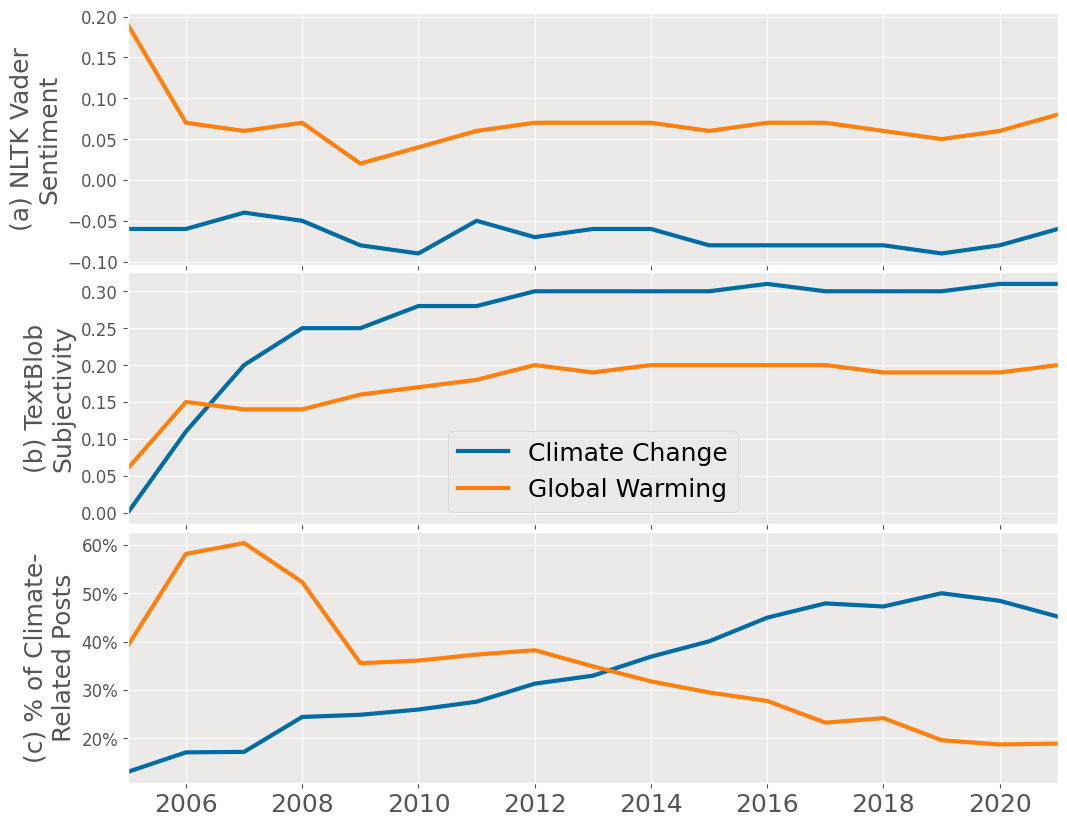

In [ ]:
# Run the plotting function
merged_unigram_plot()

### 3-Way Plot of NGram Properties

### Plot Number of Climate-Related Posts as a Percentage of Total Posts

In [ ]:
# Uncomment and modify the following line if you need to rename columns
# summary['matching'].columns = ['Month', 'All Comments', 'Climate Comments', '% Matching Comments', 'All Submissions', 'Climate Submissions', '% Matching Submissions', 'All Posts', 'Climate Posts', '% Climate Posts']

# Print the column names of the 'matching' DataFrame
print("Columns in summary['matching'] DataFrame:")
print(summary['matching'].columns)

# Drop the last row of the DataFrame, assuming it's a summary or aggregate row
summary['matching'].drop(summary['matching'].tail(1).index, inplace=True)

# Convert the 'Month' column to datetime format for easier date handling
summary['matching']['Month'] = pd.to_datetime(summary['matching']['Month'])

# Fill missing values with 0 and convert columns to integer type
for col in summary['matching'].columns[1:]:
    summary['matching'][col] = summary['matching'][col].fillna(0).astype(int)
    pass  # for auto-indentation

# Print the data types of the 'matching' DataFrame to verify the conversions
print("\nData types after conversion:")
print(summary['matching'].dtypes)

# Print the sum of 'All Comments' as Int64 type
print("\nSum of 'All Comments' as Int64:")
print(summary['matching']['All Comments'].astype('Int64').sum())

# Print the sum of 'All Comments' as a regular integer
print("\nSum of 'All Comments' as int:")
print(summary['matching']['All Comments'].sum())

# Display the 'matching' DataFrame
display(summary['matching'])


Columns in summary['matching'] DataFrame:
Index(['Month', 'All Comments', 'Climate Comments', 'All Submissions',
       'Climate Submissions', 'All Posts', 'Climate Posts'],
      dtype='object')

Data types after conversion:
Month                  datetime64[ns]
All Comments                    int64
Climate Comments                int64
All Submissions                 int64
Climate Submissions             int64
All Posts                       int64
Climate Posts                   int64
dtype: object

Sum of 'All Comments' as Int64:
10141928599

Sum of 'All Comments' as int:
10141928599


,Month,All Comments,Climate Comments,All Submissions,Climate Submissions,All Posts,Climate Posts
0,2005-06-01,0,0,103,0,103,0
1,2005-07-01,0,0,1079,3,1079,3
2,2005-08-01,0,0,2069,19,2069,19
3,2005-09-01,0,0,2449,11,2449,11
4,2005-10-01,0,0,3498,20,3498,20
...,...,...,...,...,...,...,...
188,2021-02-01,193510365,249942,31147947,26325,224658312,276267
189,2021-03-01,207454415,222934,33006103,23854,240460518,246788
190,2021-04-01,204573086,223595,31616206,28600,236189292,252195
191,2021-05-01,217655366,217732,36310673,24134,253966039,241866


In [ ]:
# Uncomment and modify the following line if you need to rename columns
# summary['matching'].columns = ['Month', 'All Comments', 'Climate Comments', '% Matching Comments', 'All Submissions', 'Climate Submissions', '% Matching Submissions', 'All Posts', 'Climate Posts', '% Climate Posts']

# Print the column names of the 'matching' DataFrame
# print("Columns in summary['matching'] DataFrame:")
# print(summary['matching'].columns)

# Drop the last row of the DataFrame, assuming it's a summary or aggregate row
summary['matching'].drop(summary['matching'].tail(1).index, inplace=True)

# Convert the 'Month' column to datetime format for easier date handling
summary['matching']['Month'] = pd.to_datetime(summary['matching']['Month'])

# Fill missing values with 0 and convert columns to integer type
for col in summary['matching'].columns[1:]:
    summary['matching'][col] = summary['matching'][col].fillna(0).astype(int)
    pass  # for auto-indentation

# Print the data types of the 'matching' DataFrame to verify the conversions
# print("\nData types after conversion:")
# print(summary['matching'].dtypes)

# Print the sum of 'All Comments' as a regular integer
print(f"Sum of 'All Comments': {summary['matching']['All Comments'].sum():,d}")

# Display the 'matching' DataFrame
# display(summary['matching'])


Sum of 'All Comments': 9,933,901,530


Total Posts: 11,244,090,043, Climate-Related Posts (before langdetect): 15,084,971
Saved SVG: /content/drive/My Drive/2024/Papers/Reddit-Climate-Data-2005-2021/Plots/Figure 2 Percentage of All Reddit Posts Matching Climate-Change Related Terms.svg


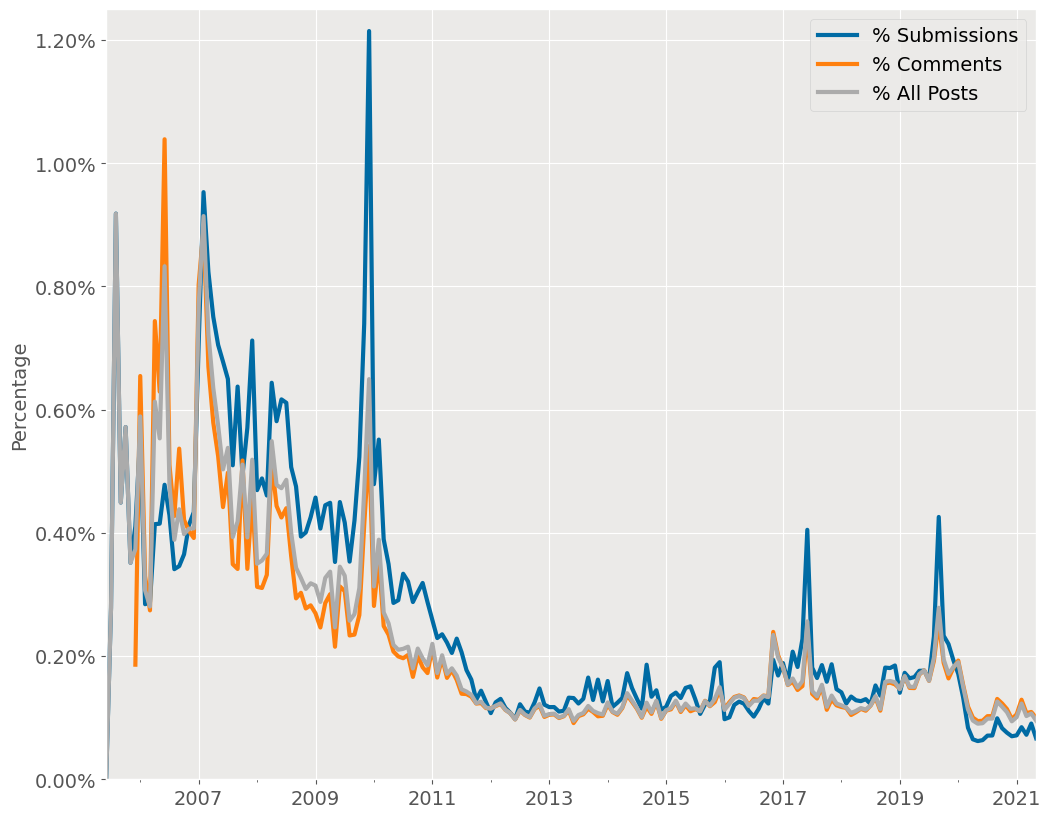

In [ ]:
# Uncomment the following lines if you need to check consistency between comments/submissions and posts
# print((( summary['matching']['All Comments'] + summary['matching']['All Submissions'] ) - summary['matching']['All Posts']).sum())
# print((( summary['matching']['Climate Comments'] + summary['matching']['Climate Submissions'] ) - summary['matching']['Climate Posts']).sum())

# Print the total number of posts and climate-related posts before language detection
print(f"Total Posts: {summary['matching']['All Posts'].sum():,d}, Climate-Related Posts (before langdetect): {summary['matching']['Climate Posts'].sum():,d}")

# Calculate the percentage of climate-related submissions, comments, and all posts
summary['matching']['% Submissions'] = summary['matching']['Climate Submissions'] * 100.0 / summary['matching']['All Submissions']
summary['matching']['% Comments'] = summary['matching']['Climate Comments'] * 100.0 / summary['matching']['All Comments']
summary['matching']['% All Posts'] = summary['matching']['Climate Posts'] * 100.0 / summary['matching']['All Posts']

# Plot the percentage of climate-related submissions, comments, and all posts over time
ax = summary['matching'].plot(
    x='Month',
    y=['% Submissions', '% Comments', '% All Posts'],
    lw=3.0,
    color=default_colors,
    figsize=(12, 10),
)

# Set the title of the plot
# ax.set_title(
#     'Percentage of All Posts Matching Climate-Change\n'
#     'Related Terms from 2005 to 2021, $n=11.5\\times10^9$',
#     fontsize=32,
# )

# Set legend font size and label for the y-axis
ax.legend(fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

# Format the y-axis as percentages
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set tick parameters for both axes
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Remove the x-axis label (if desired)
ax.set(xlabel=None)

# Set the y-axis limits to control the plot range
ax.set_ylim(0.0, 1.25)

# Save the plot
saveit("Figure 2 Percentage of All Reddit Posts Matching Climate-Change Related Terms", ax)

# Display the updated DataFrame
# display(summary['matching'])


In [ ]:
def get_matching_columns(df: pd.DataFrame, matching_text: str, value_type: str = 'Mean', confidence: str = '99%') -> pd.DataFrame:
    """
    Get the columns for the specified value type and confidence interval
    that match the provided text.

    Args:
        df (pd.DataFrame): The DataFrame to search for matching columns.
        matching_text (str): The text to match in the column names.
        value_type (str): The type of value to match (default is 'Mean').
        confidence (str): The confidence interval to match (default is '99%').

    Returns:
        pd.DataFrame: A DataFrame containing the matching columns.
    """
    print(f"Getting {matching_text} {value_type} and {confidence} Conf. Interval Columns.")

    # Filter columns based on the value_type and confidence interval, and matching_text
    matching_columns = [(x, y) for (x, y) in df.columns if (value_type in x or confidence in x) and matching_text in x]

    # Include 'Subreddit' and 'NGram' columns as well
    columns = [('Subreddit', 'Subreddit'), ('NGram', 'NGram')] + matching_columns

    # Return the filtered DataFrame or raise an error if columns are missing
    try:
        return df[columns]
    except KeyError as err:
        print(list(df.columns))  # Print the available columns if there is an error
        raise err

def barh_to_ngrams(column_text: str = 'NLTK Vader Composite Score (eng)',
                   confidence: str = '99%',
                   value_type: str = 'Mean',
                   ngrams: list = ['climate-change', 'global-warming'],
                   colors=default_colors):
    """
    Create a horizontal bar plot for specified ngrams across subreddits.

    Args:
        column_text (str): The text to match in the column names (default is 'NLTK Vader Composite Score (eng)').
        confidence (str): The confidence interval to use (default is '99%').
        value_type (str): The type of value to plot (default is 'Mean').
        ngrams (list): List of ngrams to include in the plot (default is ['climate-change', 'global-warming']).
        colors (list): List of colors to use for the plot (default is default_colors).

    Returns:
        ax (matplotlib.axes.Axes): The Axes object for the plot.
        ngrams (list): The list of ngrams included in the plot.
        y_mean (list): The mean values for the ngrams.
        yerr_mean (list): The error values for the ngrams.
    """
    df = summary['top_25_ngrams']

    # Filter DataFrame to include only specified ngrams
    df = df[df[('NGram', 'NGram')].isin(ngrams)]

    # Identify relevant subreddits, excluding certain ones
    exclude = ['All-Other-Subreddits', 'All-Subreddits']
    subreddits = set([x for x in df[('Subreddit', 'Subreddit')] if x not in exclude])
    print(f"There are {len(subreddits)} subreddits plus All-Other-Subreddits and All-Subreddits")

    # Get matching columns for the specified ngram and value type
    tmp = get_matching_columns(df, column_text, value_type, confidence)
    # print(list(tmp.columns))

    # Filter the DataFrame further to include only specified ngrams
    tmp = tmp[tmp[('NGram', 'NGram')].isin(ngrams)]

    # Select the necessary columns and rename them for easier access
    tmp = tmp[[
        ('Subreddit', 'Subreddit'),
        ('NGram', 'NGram'),
        (f'{column_text}: Mean', 'All'),
        (f'{column_text}: {confidence} Confidence Interval', 'All'),
    ]]
    tmp.columns = 'Subreddit,NGram,y,yerr'.split(",")

    # Sort subreddits and ngrams for consistent ordering in the plot
    subreddits = sorted(set([x for x in tmp['Subreddit']]), key=str.casefold, reverse=True)
    ngrams = sorted(set([x for x in tmp['NGram']]), key=str.casefold)

    # Initialize dictionaries to store y values and error bars
    y_data, yerr_data = {}, {}
    y_mean, yerr_mean = [], []
    subreddits_2 = []

    for ngram in ngrams:
        for sub in subreddits:
            if sub.startswith('All-'):
                if sub == 'All-Subreddits':
                    y_mean.append(ngram_data_df.at[sub, 'y'])
                    yerr_mean.append(ngram_data_df.at[sub, 'yerr'])
            else:
                if ngram not in y_data:
                    y_data[ngram] = []
                    yerr_data[ngram] = []
                    ngram_data_df = tmp[tmp['NGram'] == ngram].set_index('Subreddit')
                try:
                    y = ngram_data_df.at[sub, 'y']
                    yerr = ngram_data_df.at[sub, 'yerr']
                except KeyError:
                    y, yerr = float('nan'), float('nan')
                y_data[ngram].append(y)
                yerr_data[ngram].append(yerr)

    # Exclude certain subreddits and convert the dictionary to DataFrame
    subreddits = [x for x in subreddits if not x.startswith('All-')]
    y_data = pd.DataFrame.from_dict(y_data).set_index(pd.Index(subreddits))
    yerr_data = pd.DataFrame.from_dict(yerr_data).set_index(pd.Index(subreddits))

    # Create a horizontal bar plot with error bars
    ax = y_data.plot(
        kind='barh',
        xerr=yerr_data,
        color=colors,
        figsize=(12, 12),
        width=0.9,
        error_kw=dict(ecolor='gray', lw=2, capsize=3, capthick=2),
    )

    # Add shaded regions to represent confidence intervals
    for i, x in enumerate(ngrams):
        x1 = y_mean[i] - yerr_mean[i]
        x2 = y_mean[i] + yerr_mean[i]
        # print([x1, x2])
        ax.fill_between(x=[x1, x2], y1=-1, y2=40, color=colors[i], alpha=0.15)

    # Add vertical lines for mean values
    ax.vlines(y_mean, -1, 40, color=colors, lw=0.5, alpha=0.66)

    # Adjust legend text to match ngram names
    leg = ax.legend()
    leg.get_texts()[0].set_text('Climate Change')
    leg.get_texts()[1].set_text('Global Warming')

    return ax, ngrams, y_mean, yerr_mean


There are 37 subreddits plus All-Other-Subreddits and All-Subreddits
Getting NLTK Vader Composite Score (eng) Mean and 99% Conf. Interval Columns.
Saved SVG: /content/drive/My Drive/2024/Papers/Reddit-Climate-Data-2005-2021/Plots/Figure 3 Mean Vader Composite by Subreddit.svg


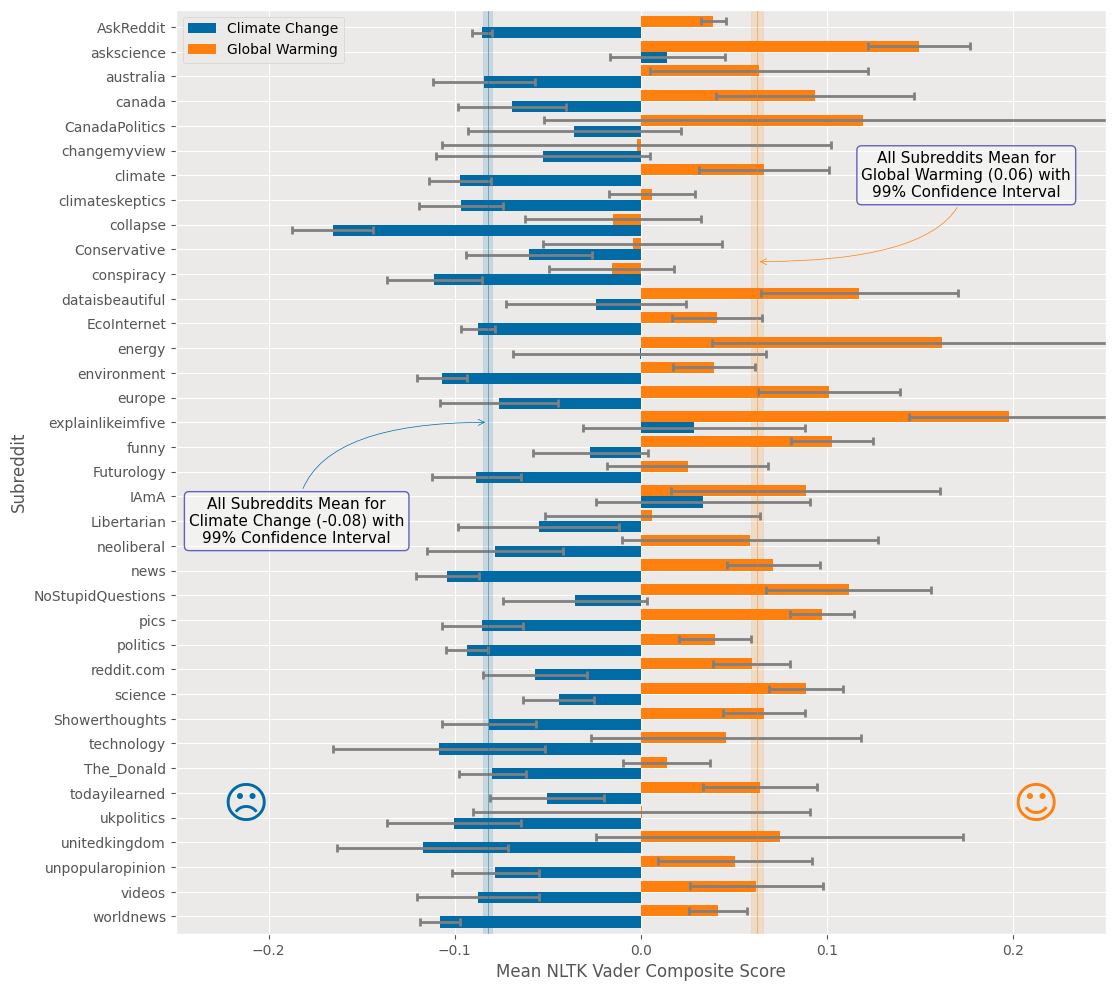

In [ ]:
def vader_comp_by_sub(colors=default_colors, confidence: str = '99%'):
    """
    Create and annotate a horizontal bar plot showing the mean NLTK Vader Composite Score
    by subreddit, highlighting the means for 'Climate Change' and 'Global Warming'.

    Args:
        colors (list): The list of colors to use for the plot (default is default_colors).
        confidence (str): The confidence interval used for annotations (default is '99%').
    """
    # Generate the bar plot using the specified ngrams and colors
    ax, ngrams, y_mean, yerr_mean = barh_to_ngrams(colors=colors)

    # Set the title of the plot
    # ax.set_title("Mean NLTK Vader Composite Score\nby Subreddit for All Dates", fontsize=32)

    # Add emoji annotations for positive and negative sentiment
    ax.text(0.2, 4, '☺', fontsize=32, color=colors[1])  # Positive sentiment emoji
    ax.text(-0.225, 4, '☹', fontsize=32, color=colors[0])  # Negative sentiment emoji

    # Annotate the mean for Climate Change with an arrow
    t = ax.annotate(f"All Subreddits Mean for\nClimate Change ({y_mean[0]:0.2f}) "
                    f"with\n{confidence} Confidence Interval",
                    xy=(y_mean[0], 20),  # Annotation location (mean value)
                    xytext=(-0.185, 16),  # Text location
                    ha="center", va="center", size=11,
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle3,angleA=90,angleB=0", color=colors[0]),
                    bbox=dict(boxstyle="round,pad=0.3", fc="#FFFFFF66", ec='#6461ba', lw=1))

    # Annotate the mean for Global Warming with an arrow
    t = ax.annotate(f"All Subreddits Mean for\nGlobal Warming ({y_mean[1]:0.2f}) "
                    f"with\n{confidence} Confidence Interval",
                    xy=(y_mean[1], 26.5),  # Annotation location (mean value)
                    xytext=(0.175, 30),  # Text location
                    ha="center", va="center", size=11,
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle3,angleA=90,angleB=0", color=colors[1]),
                    bbox=dict(boxstyle="round,pad=0.3", fc="#FFFFFF66", ec='#6461ba', lw=1))

    # Set the limits and labels for the x-axis and y-axis
    ax.set_xlim(-0.25, 0.25)
    ax.set_xlabel("Mean NLTK Vader Composite Score")
    ax.set_ylabel("Subreddit")

    # Save the plot using the saveit function
    saveit("Figure 3 Mean Vader Composite by Subreddit", ax)

    pass  # for auto-indentation

# Run the function to create the plot
vader_comp_by_sub()  # You can pass custom colors, e.g., colors=['#660000AA', '#006600AA']


There are 37 subreddits plus All-Other-Subreddits and All-Subreddits
Getting TextStat Difficult Words (eng) Mean and 99% Conf. Interval Columns.
Saved SVG: /content/drive/My Drive/2024/Papers/Reddit-Climate-Data-2005-2021/Plots/Figure 4 Mean TextStat Difficult Words Score by Subreddit.svg


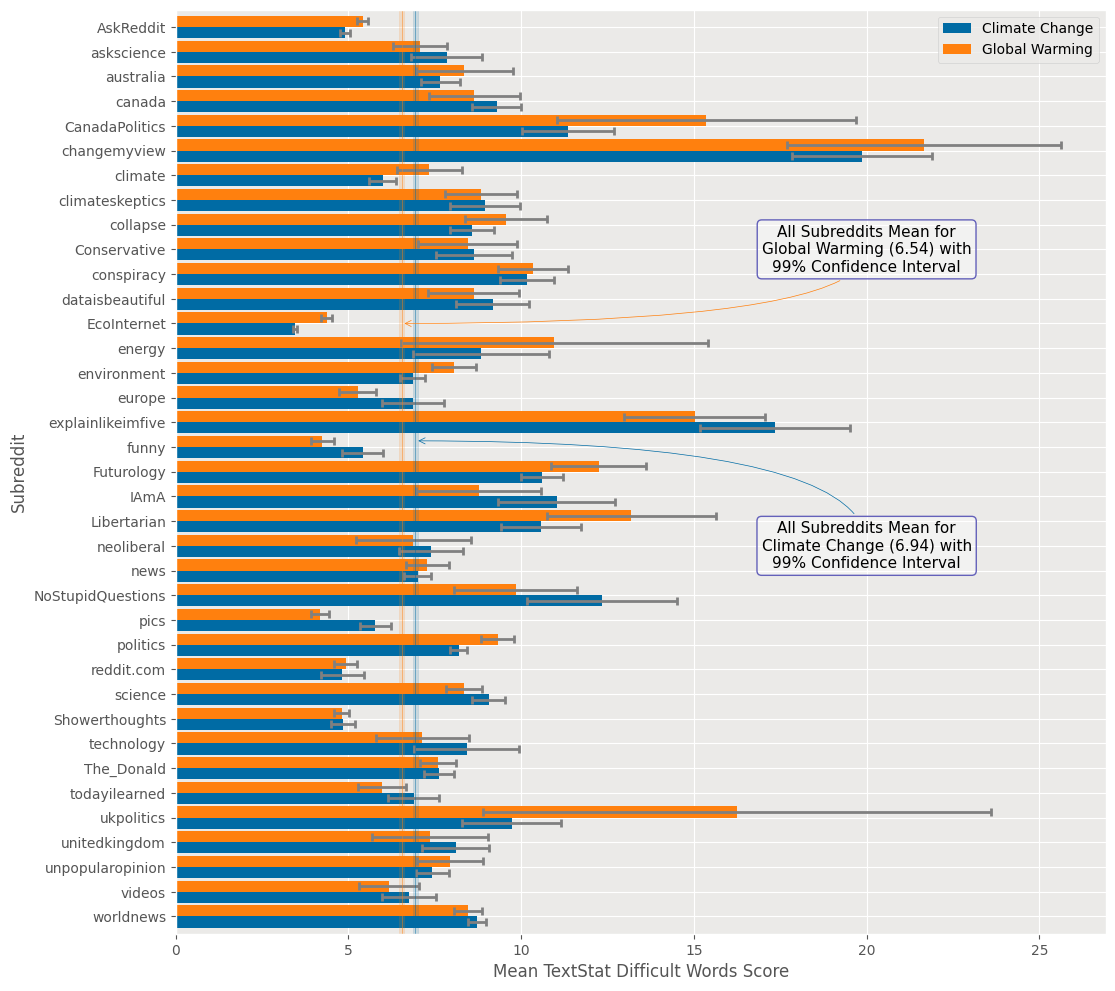

In [ ]:
def difficult_by_sub(colors=default_colors, confidence: str = '99%'):
    """
    Create and annotate a horizontal bar plot showing the mean TextStat Difficult Words Score
    by subreddit, highlighting the means for 'Climate Change' and 'Global Warming'.

    Args:
        colors (list): The list of colors to use for the plot (default is default_colors).
        confidence (str): The confidence interval used for annotations (default is '99%').
    """
    # Generate the bar plot using the specified column for TextStat Difficult Words
    ax, ngrams, y_mean, yerr_mean = barh_to_ngrams(
        column_text='TextStat Difficult Words (eng)',
        colors=colors,
        confidence=confidence
    )

    # Set the title of the plot
    # ax.set_title("Mean TextStat Difficult Words Score\nby Subreddit for All Dates", fontsize=32)

    # Annotate the mean for Climate Change with an arrow
    ax.annotate(
        f"All Subreddits Mean for\nClimate Change ({y_mean[0]:0.2f}) with\n{confidence} Confidence Interval",
        xy=(y_mean[0], 19.25),  # Annotation location (mean value)
        xytext=(20, 15),  # Text location
        ha="center", va="center", rotation=0, size=11,
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="angle3,angleA=90,angleB=0", color=colors[0]),
        bbox=dict(boxstyle="round,pad=0.3", fc="#FFFFFF66", ec='#6461ba', lw=1)
    )

    # Annotate the mean for Global Warming with an arrow
    ax.annotate(
        f"All Subreddits Mean for\nGlobal Warming ({y_mean[1]:0.2f}) with\n{confidence} Confidence Interval",
        xy=(y_mean[1], 24),  # Annotation location (mean value)
        xytext=(20, 27),  # Text location
        ha="center", va="center", rotation=0, size=11,
        arrowprops=dict(arrowstyle="->",
                        connectionstyle="angle3,angleA=90,angleB=0", color=colors[1]),
        bbox=dict(boxstyle="round,pad=0.3", fc="#FFFFFF66", ec='#6461ba', lw=1)
    )

    # Set the labels for the x-axis and y-axis
    ax.set_xlabel("Mean TextStat Difficult Words Score")
    ax.set_ylabel("Subreddit")

    # Save the plot using the saveit function
    saveit("Figure 4 Mean TextStat Difficult Words Score by Subreddit", ax)

    pass  # for auto-indentation

# Run the function to create the plot
difficult_by_sub()  # You can pass custom colors, e.g., colors=['#660000AA', '#006600AA']


### Google Trends for Climate Change and Global Warming Searches

Fetching Google Trends 2004-2022 for Climate Change and Global Warming (df).
header=[0]
 -     To View: https://drive.google.com/file/d/1tJYr0q_ziN6bo8h7jnBokDVTAT0Wkwc5/view?usp=sharing
 - To Download: https://drive.google.com/uc?id=1tJYr0q_ziN6bo8h7jnBokDVTAT0Wkwc5
13.757064090957584
Spearman correlation: 0.8912697411592776
Saved SVG: /content/drive/My Drive/2024/Papers/Reddit-Climate-Data-2005-2021/Plots/Figure 5 Google Search Trend Scores from 2004 to 2022 for Climate Change and Global Warming.svg


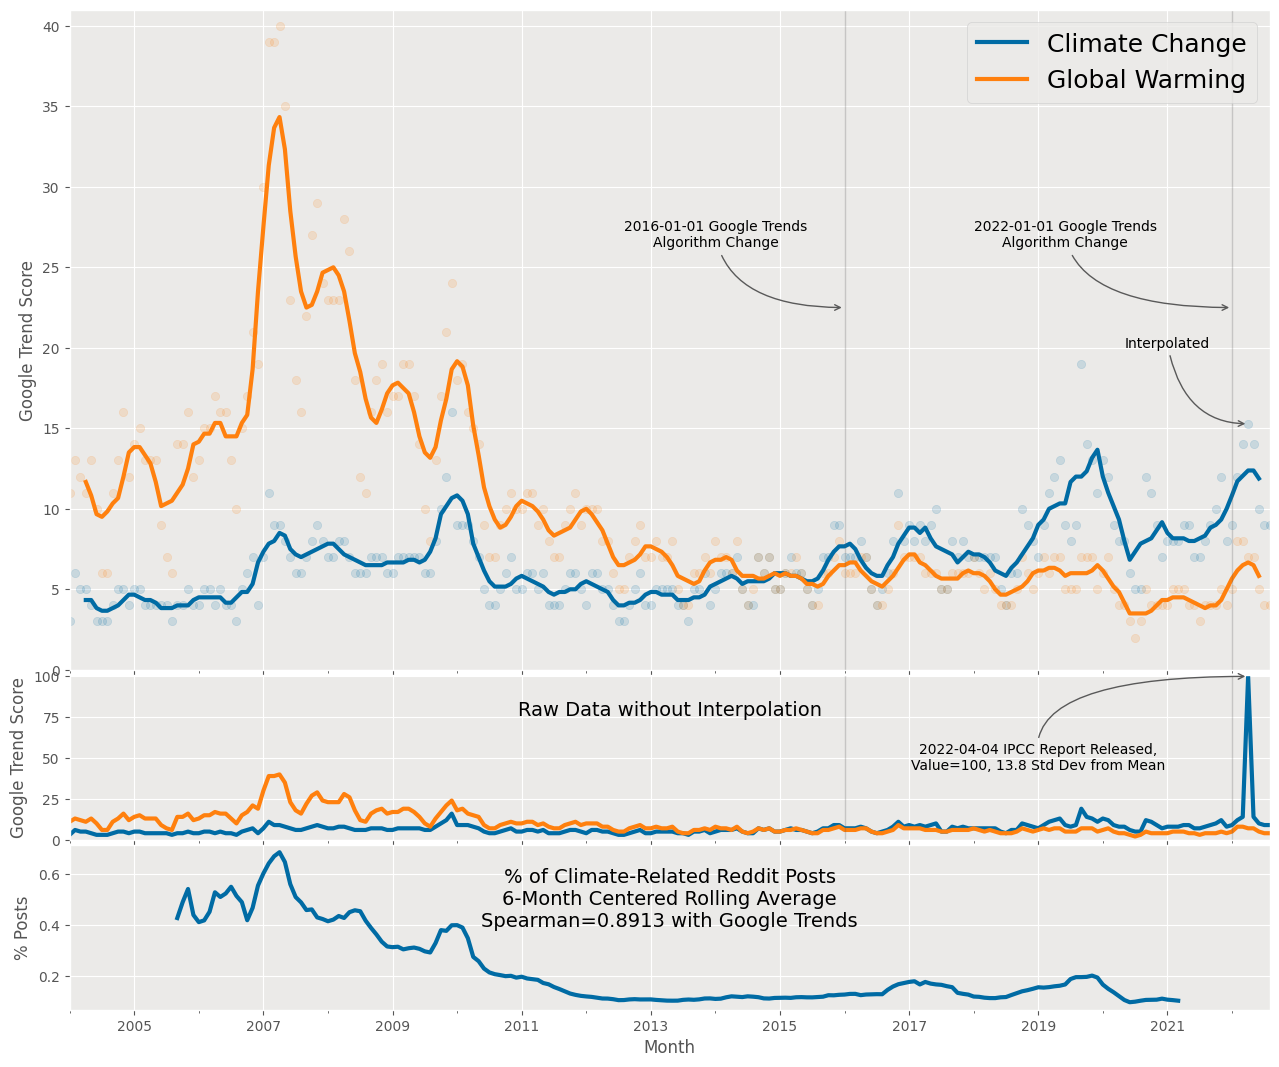

In [ ]:
def annot1(ax, text, xy, xytext, style, color=default_colors[3]):
    """
    Annotate a plot with an arrow and styled text.

    Args:
        ax (matplotlib.axes.Axes): The axis on which to annotate.
        text (str): The text to display in the annotation.
        xy (tuple): The point (x, y) to annotate.
        xytext (tuple): The point (x, y) where the text should be placed.
        style (str): The connection style for the annotation arrow.
        color (str): The color of the annotation arrow and text (default is the fourth color in default_colors).
    """
    return ax.annotate(
        text,
        xy=xy,
        xytext=xytext,
        ha="center",
        va="center",
        rotation=0,
        size=10,
        arrowprops={
            'arrowstyle': "->",
            'connectionstyle': style,
            'color': color,
            'lw': 1.0,
        },
    )

def plot_google_trends():
    """
    Plot Google Trends data for 'Climate Change' and 'Global Warming' from 2004 to 2022,
    along with Reddit post percentages, including annotations and interpolations.

    Returns:
        tuple: Rolling averages of Google Trends and Reddit posts data.
    """
    if 'google_trends' not in summary:
        print("Fetching Google Trends 2004-2022 for Climate Change and Global Warming (df).")
        df = get_csv_by_id('1tJYr0q_ziN6bo8h7jnBokDVTAT0Wkwc5')
        # Drop unnecessary 'Notes' column
        df.drop(columns=['Notes'], inplace=True)
        # Convert 'Month' column to datetime format
        df['Month'] = pd.to_datetime(df['Month'])
        # Set 'Month' as the DataFrame index
        df.set_index('Month', inplace=True)
        # Rename columns for clarity
        df.columns = ['"Global Warming"', '"Climate Change"', 'Global Warming', 'Climate Change']
        summary['google_trends'] = df
    else:
        print("Google Trends 2004-2022 data already loaded. Not loading again.")
        df = summary['google_trends']

    # Create subplots with specific height ratios
    fig, (ax, ax2, ax3) = plt.subplots(
        3,
        gridspec_kw={'height_ratios': [4, 1, 1]},
        sharex=True,
        figsize=(12, 12),
    )

    # Handle outlier in Google Trends data (2022-04) by interpolation
    interp_df = df.replace(100, np.nan)
    interp_df.interpolate(method='cubic', inplace=True)
    rolling1_df = interp_df.rolling(window=6, center=True).mean()

    # Plot the rolling averages of Google Trends data
    rolling1_df.plot.line(
        y=['Climate Change', 'Global Warming'],
        lw=3.0,
        color=default_colors,
        ax=ax,
    )

    # Store the date and value of the interpolated point for annotation
    date1 = pd.to_datetime('2022-04')
    val1 = interp_df.loc[date1, 'Climate Change']

    # Set up the main plot's title and appearance
    ax.legend(fontsize=18)
    # ax.set_title(
    #     "Google Search Trend Scores from 2004 to 2022\n"
    #     "for Climate Change and Global Warming\n"
    #     "6-Month Centered Rolling Average",
    #     fontsize=24,
    # )
    ax.scatter(interp_df.index, interp_df['Climate Change'], color=default_colors[0], alpha=0.15)
    ax.scatter(interp_df.index, interp_df['Global Warming'], color=default_colors[1], alpha=0.15)
    ax.set_ylabel('Google Trend Score', fontsize=12)
    ax.set_ylim(0, 41)

    # Add vertical lines to the main plot
    ax.vlines(
        [
            pd.to_datetime('2022-01'),
            pd.to_datetime('2016-01'),
        ],
        ymin=0,
        ymax=41,
        color=default_colors[3],
        alpha=0.25,
        lw=1,
    )

    # Plot the raw Google Trends data without interpolation
    df.plot.line(
        y=['Climate Change', 'Global Warming'],
        lw=3.0,
        color=default_colors,
        ax=ax2,
    )
    ax2.set_ylabel('Google Trend Score', fontsize=12)
    ax2.get_legend().remove()
    ax2.set_title("Raw Data without Interpolation", fontsize=14, y=0.70)
    ax2.set_ylim(0, 101)

    # Add vertical lines to the raw data plot
    ax2.vlines(
        [
            pd.to_datetime('2022-01'),
            pd.to_datetime('2016-01'),
        ],
        ymin=0,
        ymax=101,
        color=default_colors[3],
        alpha=0.25,
        lw=1,
    )

    # Annotate the plot with relevant events
    annot1(
        ax, "2016-01-01 Google Trends\nAlgorithm Change",
        xy=[pd.to_datetime('2016-01'), 22.5],
        xytext=[pd.to_datetime('2014-01'), 27],
        style="angle3,angleA=100,angleB=0",
    )
    annot1(
        ax, "2022-01-01 Google Trends\nAlgorithm Change",
        xy=[pd.to_datetime('2022-01'), 22.5],
        xytext=[pd.to_datetime('2019-06'), 27],
        style="angle3,angleA=100,angleB=0",
    )
    annot1(
        ax, "Interpolated",
        xy=(date1, val1),
        xytext=(pd.to_datetime('2021-01'), val1 + 5),
        style="angle3,angleA=100,angleB=0",
    )

    # Calculate mean and standard deviation for 'Climate Change' trend
    mean = df['Climate Change'].mean()
    std = df['Climate Change'].std()
    z_score = (100 - mean) / std
    print(z_score)

    # Annotate the raw data plot with specific events
    annot1(
        ax2,
        f"2022-04-04 IPCC Report Released,\nValue=100, {z_score:0.1f} Std Dev from Mean",
        xy=(pd.to_datetime('2022-04'), 100),
        xytext=(pd.to_datetime('2019-01'), 50),
        style="angle3,angleA=100,angleB=0",
    )

    # Plot the rolling average of Reddit post percentages
    rolling2_df = summary['matching'].set_index('Month').rolling(window=6, center=True).mean()['% All Posts']
    rolling2_df.plot(
        ax=ax3,
        y=['% All Posts'],
        lw=3.0,
        color=default_colors,
        figsize=(12, 10),
    )
    ax3.set_ylabel('% Posts', fontsize=12)

    # Set x-axis limits for all plots
    ax.set_xlim(
        pd.to_datetime('2004-01'),
        pd.to_datetime('2022-08')
    )

    # Calculate Spearman correlation between trends and Reddit posts
    combined_trends = rolling1_df['Climate Change'] + rolling1_df['Global Warming']
    combined_df = pd.concat([combined_trends, rolling2_df], axis=1).dropna()
    combined_df.columns = ['Combined Climate Change and\nGlobal Warming Search Trends', '% of Climate Related Reddit Posts']
    spearman = combined_df.corr(method='spearman').iloc[0, 1]
    print(f"Spearman correlation: {spearman}")

    # Annotate the Reddit post plot with correlation information
    ax3.set_title(
        f"% of Climate-Related Reddit Posts\n6-Month Centered Rolling Average\nSpearman={spearman:0.4f} with Google Trends",
        fontsize=14,
        y=0.45,
    )

    # Adjust subplot spacing
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0.0, hspace=0.015)

    # Save the final plot
    saveit("Figure 5 Google Search Trend Scores from 2004 to 2022 for Climate Change and Global Warming", ax)

    return rolling1_df, rolling2_df

# Call the function to generate and save the plots
r1, r2 = plot_google_trends()
